In [2]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

α = .05

from env import get_db_url
import wrangle as wr
import explore as ex

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Project Goals:

To create a viable predictive model based off of the 2017 Zillow tax valuations

## Description

It has become exceedingly important to be able to be able to identify valuable real estate, and properties are flying off the market at an exceptional rate because of the strong buyers market. By analyzing property data from select counties in California, I hope to create a predictive model that can better estimate high value properties on the market.


# Wrangle

In this step we aquire and clean the data, making it more useful for analysis.

## Acquire

### First we selected single family homes with transaction dates in 2017 using the Zillow SQL database

    SELECT 
        bedroomcnt AS bedrooms, 
        bathroomcnt AS bathrooms,
        calculatedfinishedsquarefeet AS sq_ft,
        taxvaluedollarcnt AS tax_value,
        yearbuilt AS year_built,
        lotsizesquarefeet AS lot_size,
        fips
    FROM
        properties_2017
       JOIN propertylandusetype using (propertylandusetypeid)
       JOIN predictions_2017 USING(parcelid)
    WHERE propertylandusedesc in ("Single Family Residential", 
                                "Inferred Single Family Residential")
       AND transactiondate LIKE "2017%%";
       
### total observations collected: 52,441

## Clean

- Dropped null and duplicate values
- Optimized data by converting select columns data types
- Encoded and renamed FIPS to further ease of use and modeling
- Removed outliers with a p-value of less than 0.001 using Mehalanobis distance

### Total observations after cleaning: 49,586

- 94.5% of my total data was left after cleaning, which I am comfortable with for my model


#### After acquiring and cleaning the data, the current data was placed into a .csv file for ease of use

### Data Dictionary:

   | Column/Feature | Description |
    |--- | --- |
    | __bathrooom__ | The number of bathrooms in the home. |\n
    | __bedrooms__ | The number of bedrooms in the home. |\n
    | __tax_value__ | The tax-assessed value of the home. <br> __Not__ the home's ultimate sale price. |\n
    | __sq_feet__ | The home's square footage. |\n
    | __year_built__ | The year the home was built. |\n
    | __fips__ | \"Federal Information Process System\" code, used to <br> identify zip codes in the U.S. |\n
    | __lot_size__ | The square footage of the lot on which <br> the home is built. |

In [12]:
df = wr.get_zillow_data()
df.head()

,bedrooms,bathrooms,sq_ft,tax_value,year_built,lot_size,LA,orange,ventura
0,4,3.5,3100,1023282,1998,4506,0,1,0
1,2,1.0,1465,464000,1967,12647,0,0,1
2,3,2.0,1243,564778,1962,8432,0,1,0
3,4,3.0,2376,145143,1970,13038,1,0,0
4,4,3.0,2962,773303,1950,63000,1,0,0


# Exploration

## Key Questions:

>- Is there a significant relationship between bedrooms and home value?
>- Is there a significant relationship between bathrooms and home value?
>- Is there a significant relationship between lot size and home value?
>- Is there a significant relationship between square footage and home value?
>- Is there a significant relationship between county and home value?

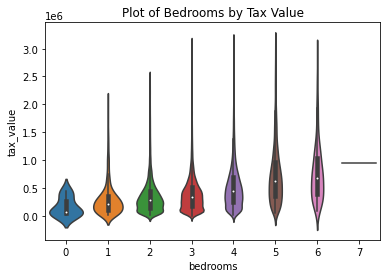

In [13]:
sns.jointplot(x = "bedrooms", y = "tax_value", data = train, kind = 'reg',
                  joint_kws = {'line_kws':{'color':'red'}});